In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [2]:
df = pd.read_csv('car_pricesK.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512791 entries, 0 to 512790
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          512791 non-null  int64  
 1   make          512791 non-null  object 
 2   model         512791 non-null  object 
 3   trim          512791 non-null  object 
 4   body          512791 non-null  object 
 5   transmission  512791 non-null  object 
 6   vin           512791 non-null  object 
 7   state         512791 non-null  object 
 8   condition     512791 non-null  int64  
 9   odometer      512791 non-null  float64
 10  color         512791 non-null  object 
 11  interior      512791 non-null  object 
 12  seller        512791 non-null  object 
 13  mmr           512791 non-null  float64
 14  sellingprice  512791 non-null  float64
 15  saledate      512791 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 62.6+ MB


In [4]:
df.shape

(512791, 16)

In [5]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,California,5,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,California,5,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,California,1,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


In [6]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [7]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition         int64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [8]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,512791.000000,512791.000000,512791.000000,512791.000000,512791.000000
mean,2010.161892,3.569563,65298.642751,13071.410477,12916.098459
std,3.784217,1.299893,46323.787564,7546.976871,7686.285658
min,1989.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,3.000000,28755.000000,7450.000000,7200.000000
50%,2012.000000,4.000000,51763.000000,12250.000000,12100.000000
75%,2013.000000,5.000000,96378.500000,17750.000000,17700.000000
max,2015.000000,5.000000,202512.000000,34800.000000,230000.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df1  =df.isnull().sum()
df1

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [11]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [12]:
print(df['condition'])

0         1
1         1
2         5
3         5
4         1
         ..
512786    4
512787    1
512788    5
512789    4
512790    4
Name: condition, Length: 512791, dtype: int64


In [13]:
df['condition'] = df['condition'].fillna(df['condition'].mean())
bins = [0, 10, 20, 30, 40, 50]
labels = [1, 2, 3, 4, 5]

df['condition'] = pd.cut(df['condition'], bins=bins, labels=labels, right=True, include_lowest=True)

df['condition'] = df['condition'].astype(int)

In [14]:
print(df['condition'])

0         1
1         1
2         1
3         1
4         1
         ..
512786    1
512787    1
512788    1
512789    1
512790    1
Name: condition, Length: 512791, dtype: int32


In [15]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [16]:
df['make'] = df['make'].fillna(df['make'].mode()[0])
df['state'] = df['state'].fillna(df['state'].mode()[0])
df['color'] = df['color'].fillna(df['color'].mode()[0])
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['body'] = df['body'].fillna(df['body'].mode()[0])

In [17]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


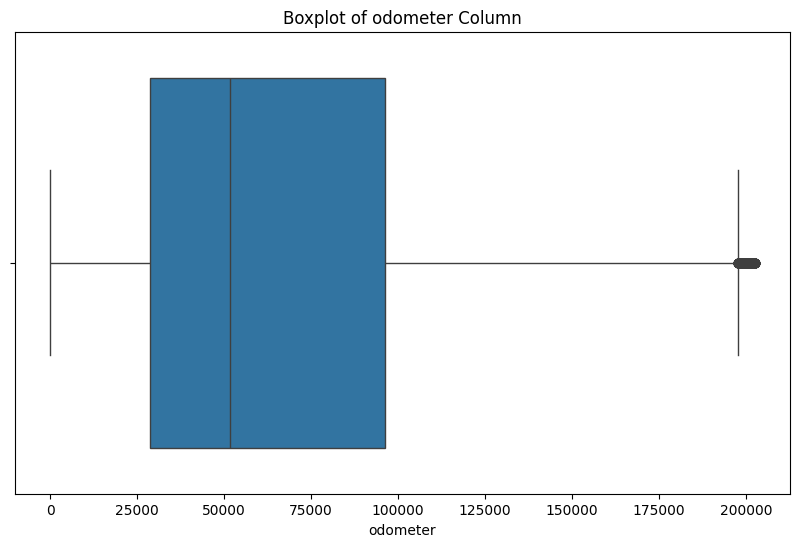

In [18]:

# Create the boxplot for the 'condition' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Boxplot of odometer Column')
plt.xlabel('odometer')
plt.show()


In [19]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [20]:
q1 = df.odometer.quantile(0.25)
q3 = df.odometer.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
df = df[(df.odometer >= lower_limit) & (df.odometer <= upper_limit)]

In [21]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [22]:
q1 = df.mmr.quantile(0.25)
q3 = df.mmr.quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
df = df[(df.mmr >= lower_limit) & (df.mmr <= upper_limit)]

In [23]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


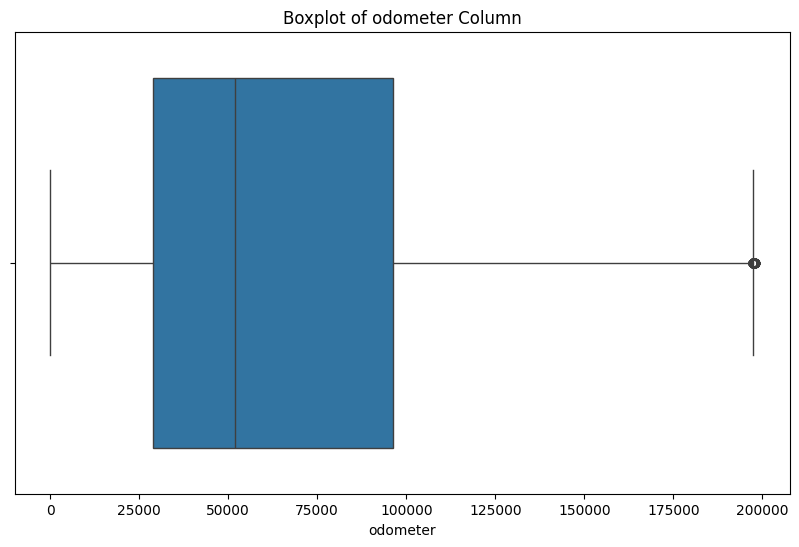

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Boxplot of odometer Column')
plt.xlabel('odometer')
plt.show()

In [25]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [26]:
df['transmission'] = df['transmission'].replace(to_replace = 'Sedan', value = 'automatic')
df['body'] = df['body'].replace(to_replace = 'suv', value = 'SUV')

In [27]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [28]:
make_replacement = {
    'chev truck': 'Chevrolet',
    'dodge tk': 'Dodge',
    'gmc truck': 'GMC',
    'hyundai tk': 'Hyundai',
    'landrover': 'Land Rover',
    'mazda tk': 'Mazda',
    'mercedes': 'Mercedes-Benz',
    'mercedes-b': 'Mercedes-Benz',
    'ford tk': 'Ford',
    'ford truck': 'Ford',
    'vw': 'Volkswagen'
}
df['make'] = df['make'].replace(make_replacement)

In [29]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [30]:
"""states_to_keep = ['al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la',
                  'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'nj', 'nm', 'nv',
                  'ny', 'oh', 'ok', 'or', 'pa', 'pr', 'qe', 'sc', 'tn', 'tx',
                  'ut', 'va', 'wa', 'wi']
df = df[df['state'].isin(states_to_keep)]
state_dict = {
    'al': 'Alabama',
    'az': 'Arizona',
    'ca': 'California',
    'co': 'Colorado',
    'fl': 'Florida',
    'ga': 'Georgia',
    'hi': 'Hawaii',
    'il': 'Illinois',
    'in': 'Indiana',
    'la': 'Louisiana',
    'ma': 'Massachusetts',
    'md': 'Maryland',
    'mi': 'Michigan',
    'mn': 'Minnesota',
    'mo': 'Missouri',
    'ms': 'Mississippi',
    'nc': 'North Carolina',
    'nj': 'New Jersey',
    'nm': 'New Mexico',
    'nv': 'Nevada',
    'ny': 'New York',
    'oh': 'Ohio',
    'ok': 'Oklahoma',
    'on': 'Ontario',
    'or': 'Oregon',
    'pa': 'Pennsylvania',
    'pr': 'Puerto Rico',
    'qe': 'Quebec',
    'sc': 'South Carolina',
    'tn': 'Tennessee',
    'tx': 'Texas',
    'ut': 'Utah',
    'va': 'Virginia',
    'wa': 'Washington',
    'wi': 'Wisconsin'
}
df['state'] = df['state'].replace(state_dict)"""

"states_to_keep = ['al', 'az', 'ca', 'co', 'fl', 'ga', 'hi', 'il', 'in', 'la',\n                  'ma', 'md', 'mi', 'mn', 'mo', 'ms', 'nc', 'nj', 'nm', 'nv',\n                  'ny', 'oh', 'ok', 'or', 'pa', 'pr', 'qe', 'sc', 'tn', 'tx',\n                  'ut', 'va', 'wa', 'wi']\ndf = df[df['state'].isin(states_to_keep)]\nstate_dict = {\n    'al': 'Alabama',\n    'az': 'Arizona',\n    'ca': 'California',\n    'co': 'Colorado',\n    'fl': 'Florida',\n    'ga': 'Georgia',\n    'hi': 'Hawaii',\n    'il': 'Illinois',\n    'in': 'Indiana',\n    'la': 'Louisiana',\n    'ma': 'Massachusetts',\n    'md': 'Maryland',\n    'mi': 'Michigan',\n    'mn': 'Minnesota',\n    'mo': 'Missouri',\n    'ms': 'Mississippi',\n    'nc': 'North Carolina',\n    'nj': 'New Jersey',\n    'nm': 'New Mexico',\n    'nv': 'Nevada',\n    'ny': 'New York',\n    'oh': 'Ohio',\n    'ok': 'Oklahoma',\n    'on': 'Ontario',\n    'or': 'Oregon',\n    'pa': 'Pennsylvania',\n    'pr': 'Puerto Rico',\n    'qe': 'Quebec',\n    '

In [31]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


#DATA VISUALIZATION

In [32]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [33]:
df_usstate = df.groupby('state')['sellingprice'].mean().head(15)

df_usstate

state
Alabama           9440.000000
Arizona          11164.200682
California       12943.678350
Colorado         14989.972008
Florida          13082.792149
Georgia          12262.439586
Hawaii           11997.670549
Illinois         14297.537484
Indiana          10779.315298
Louisiana        10457.764562
Maryland          7716.590010
Massachusetts     6903.174411
Michigan         14480.258953
Minnesota        13427.667261
Mississippi      11063.864416
Name: sellingprice, dtype: float64

In [34]:
MAKE_PRICE = df.groupby('make')['sellingprice'].mean().head(15)

MAKE_PRICE

make
Acura        14132.190407
Audi         15431.180470
BMW          16439.040206
Buick        10636.497934
Cadillac     13100.688439
Chevrolet    11237.762228
Chrysler     10863.559211
Daewoo         400.000000
Dodge        11059.638698
FIAT          9946.722293
Ford         14110.888658
GMC          15930.100011
Geo            588.461538
HUMMER       15143.863402
Honda        11439.088529
Name: sellingprice, dtype: float64

In [35]:
typeofcar = df.groupby('body')['sellingprice'].mean().head(15)

typeofcar

body
Access Cab            14152.857143
Beetle Convertible    18070.192308
CTS Coupe             22758.527132
CTS Wagon             17811.538462
CTS-V Coupe           30500.000000
Cab Plus               2300.000000
Cab Plus 4             8680.000000
Club Cab               4767.181208
Convertible           13042.902860
Coupe                 12683.141099
Crew Cab              18805.979931
CrewMax Cab           23342.307692
Double Cab            22959.989336
E-Series Van          19236.373864
Elantra Coupe         12337.341772
Name: sellingprice, dtype: float64

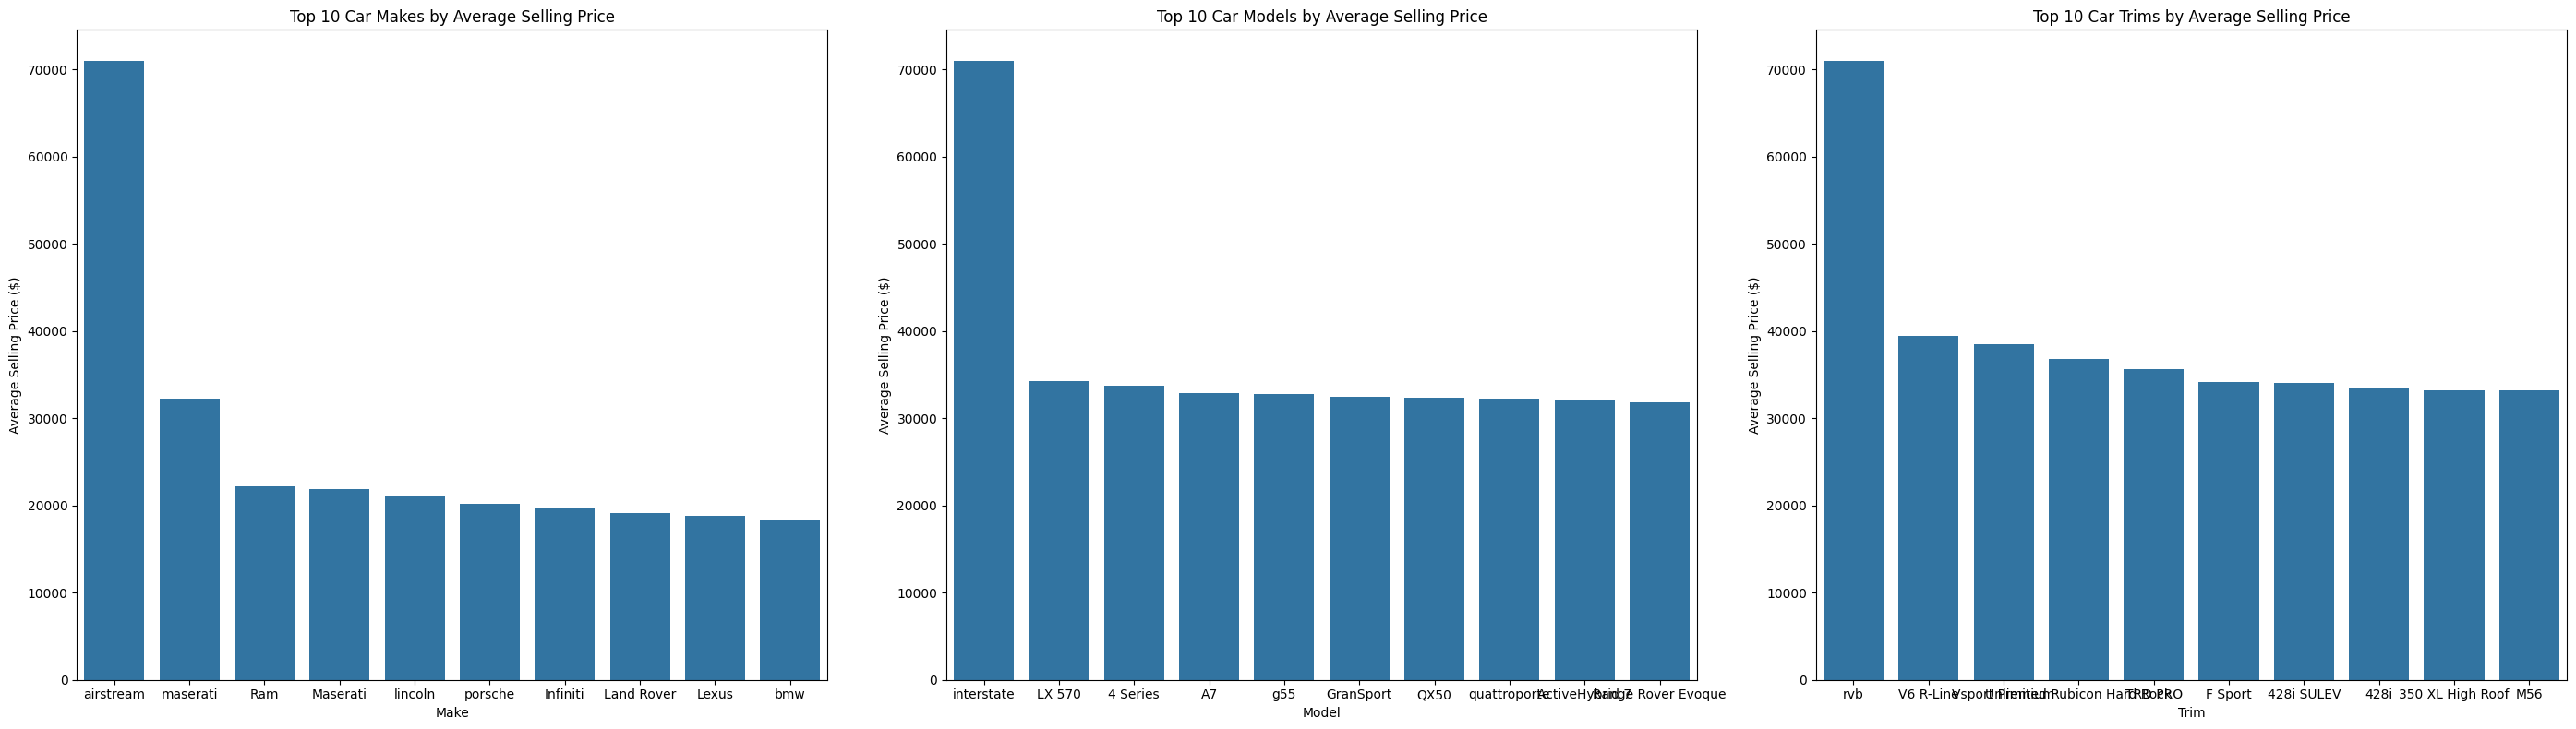

In [36]:
# Calculate average selling price by make, model, and trim
df_avg_make = df.groupby('make')['sellingprice'].mean().reset_index()
df_avg_model = df.groupby('model')['sellingprice'].mean().reset_index()
df_avg_trim = df.groupby('trim')['sellingprice'].mean().reset_index()

# Sort by average selling price and select top 10 for each category
df_avg_make = df_avg_make.sort_values(by='sellingprice', ascending=False).head(10)
df_avg_model = df_avg_model.sort_values(by='sellingprice', ascending=False).head(10)
df_avg_trim = df_avg_trim.sort_values(by='sellingprice', ascending=False).head(10)

# Plotting subplots for make, model, and trim
plt.figure(figsize=(28, 8))

# Plot 1: Top 10 Car Makes by Average Selling Price
plt.subplot(1, 3, 1)
sns.barplot(x='make', y='sellingprice', data=df_avg_make)
plt.title('Top 10 Car Makes by Average Selling Price')
plt.xlabel('Make')
plt.ylabel('Average Selling Price ($)')

# Plot 2: Top 10 Car Models by Average Selling Price
plt.subplot(1, 3, 2)
sns.barplot(x='model', y='sellingprice', data=df_avg_model)
plt.title('Top 10 Car Models by Average Selling Price')
plt.xlabel('Model')
plt.ylabel('Average Selling Price ($)')

# Plot 3: Top 10 Car Trims by Average Selling Price
plt.subplot(1, 3, 3)
sns.barplot(x='trim', y='sellingprice', data=df_avg_trim)
plt.title('Top 10 Car Trims by Average Selling Price')
plt.xlabel('Trim')
plt.ylabel('Average Selling Price ($)')

plt.tight_layout()
plt.show()

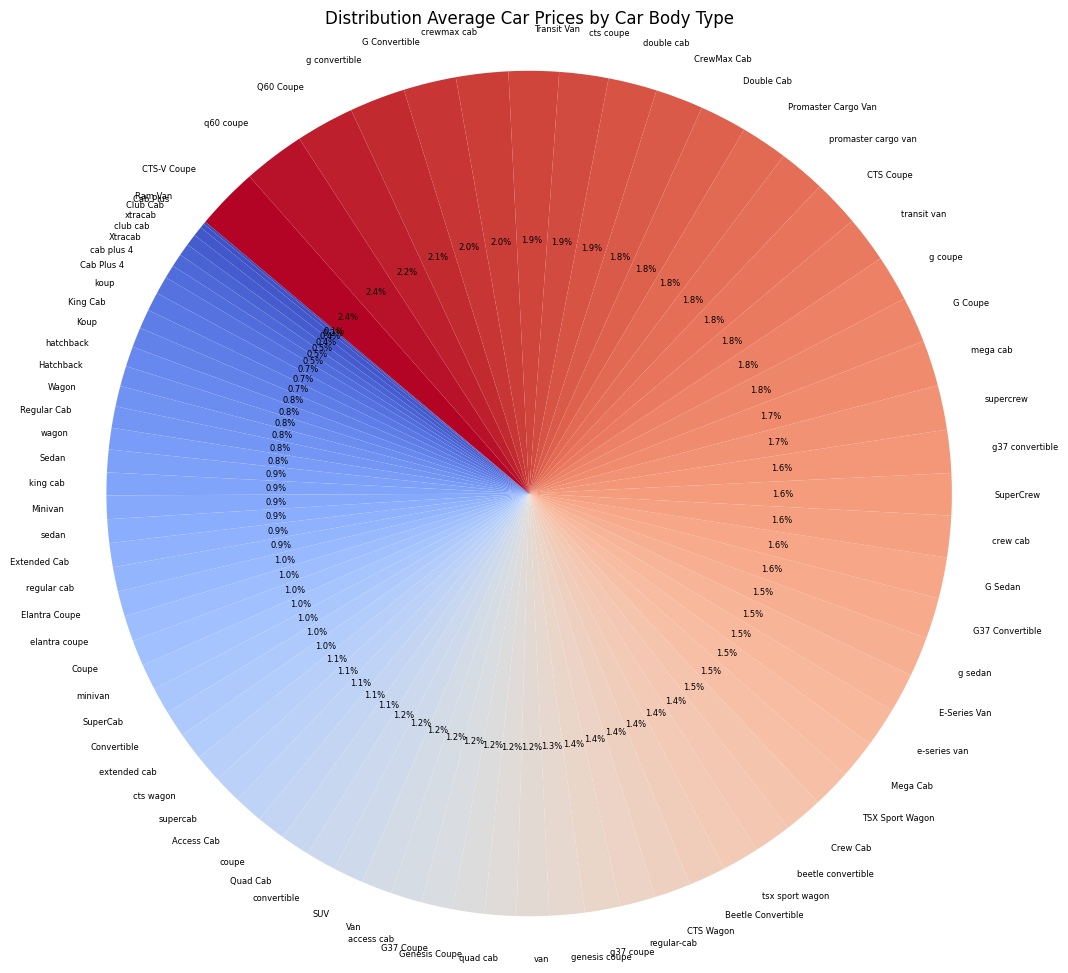

In [37]:
import numpy as np  # Make sure to import NumPy

# Average car prices by body type
car_body_price = df.groupby('body')['sellingprice'].mean().sort_values()

plt.figure(figsize=(12, 12))
colors = plt.cm.coolwarm(np.linspace(0, 1, len(car_body_price)))  # Generate colors from colormap

# Create pie chart
wedges, texts, autotexts = plt.pie(car_body_price, labels=car_body_price.index, autopct='%1.1f%%', startangle=140, colors=colors)


for text in texts:
    text.set_size(6)

for autotext in autotexts:
    autotext.set_size(6)

plt.title('Distribution Average Car Prices by Car Body Type')
plt.axis('equal')

plt.show()



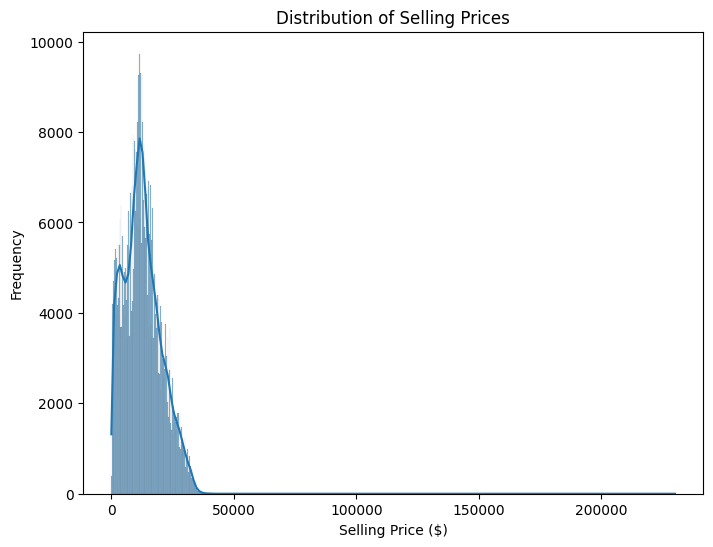

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sellingprice'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price ($)')
plt.ylabel('Frequency')
plt.show()

In [39]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,California,1,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,California,1,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


#FEATURE ENGINEERING

In [40]:
df.drop('trim', inplace= True, axis= 1)

df.drop('vin', inplace= True, axis= 1)

df.drop('interior', inplace= True, axis= 1)

df.drop('color', inplace= True, axis= 1)

df.drop('model', inplace= True, axis = 1)

df.drop('seller', inplace= True, axis = 1)

In [41]:
df_final = df.rename(columns = {'sellingprice': 'Selling Price', 'mmr': 'MMR', 'odometer': 'Odometer', 'condition': 'Condition','year': 'Make Year'})

#df.rename(columns = {'transmission_automatic': 'Is Automatic', 'transmission_manual': 'Is Manual'})

In [42]:
#doing the target encoding on body as well
df['Type'] = df['body'].map(typeofcar)

In [43]:
df.head()

,year,make,body,transmission,state,condition,odometer,mmr,sellingprice,saledate,Type
0,2015,Kia,SUV,automatic,California,1,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,SUV,automatic,California,1,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,Sedan,automatic,California,1,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,Sedan,automatic,California,1,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2015,Nissan,Sedan,automatic,California,1,5554.0,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),NaN


In [44]:
df = df.drop('body', axis= 1)
df.head()

,year,make,transmission,state,condition,odometer,mmr,sellingprice,saledate,Type
0,2015,Kia,automatic,California,1,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,automatic,California,1,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,automatic,California,1,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,automatic,California,1,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2015,Nissan,automatic,California,1,5554.0,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),NaN


###Doing OHE on Transmission column

In [45]:
df.transmission.value_counts()

transmission
automatic    492181
manual        15727
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [47]:
arry = ohe.fit_transform(df[['transmission']]).toarray()

df_ohe=pd.DataFrame(arry, columns=ohe.get_feature_names_out())
df_ohe


,transmission_automatic,transmission_manual
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
507903,1.0,0.0
507904,1.0,0.0
507905,1.0,0.0
507906,1.0,0.0


In [48]:
df_ohe.index = df.index

In [49]:
df = pd.concat([df, df_ohe], axis =1).drop(columns= 'transmission')

In [50]:
df.isnull().sum()

year                           0
make                           0
state                          0
condition                      0
odometer                       0
mmr                            0
sellingprice                   0
saledate                       0
Type                      472981
transmission_automatic         0
transmission_manual            0
dtype: int64

In [51]:
df['Is Automatic'] = df['transmission_automatic']

In [52]:
df.head()

,year,make,state,condition,odometer,mmr,sellingprice,saledate,Type,transmission_automatic,transmission_manual,Is Automatic
0,2015,Kia,California,1,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN,1.0,0.0,1.0
1,2015,Kia,California,1,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN,1.0,0.0,1.0
2,2014,BMW,California,1,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN,1.0,0.0,1.0
3,2015,Volvo,California,1,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN,1.0,0.0,1.0
4,2015,Nissan,California,1,5554.0,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),NaN,1.0,0.0,1.0


In [53]:
df.drop('transmission_automatic', inplace =True, axis =1)

df.drop('transmission_manual', inplace =True, axis =1)

In [54]:
df.head()

,year,make,state,condition,odometer,mmr,sellingprice,saledate,Type,Is Automatic
0,2015,Kia,California,1,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN,1.0
1,2015,Kia,California,1,9393.0,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN,1.0
2,2014,BMW,California,1,1331.0,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN,1.0
3,2015,Volvo,California,1,14282.0,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN,1.0
4,2015,Nissan,California,1,5554.0,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),NaN,1.0


In [55]:
df['Is Automatic'].value_counts()

Is Automatic
1.0    492181
0.0     15727
Name: count, dtype: int64

In [56]:
df.drop('saledate', inplace = True, axis = 1)

###Target Encoding

In [57]:
df['state'].unique()

array(['California', 'Wisconsin', 'Florida', 'New Jersey', 'Pennsylvania',
       'Nevada', 'Georgia', 'Virginia', 'North Carolina', 'Indiana',
       'Illinois', 'Tennessee', 'Minnesota', 'Michigan', 'Ohio', 'Texas',
       'Arizona', 'Colorado', 'Utah', 'Missouri', 'New York',
       'Massachusetts', 'Puerto Rico', 'South Carolina', 'Oregon',
       'Maryland', 'Louisiana', 'Washington', 'Hawaii', 'Oklahoma',
       'New Mexico', 'Mississippi', 'Alabama'], dtype=object)

In [58]:
df_usstate = df.groupby('state')['sellingprice'].mean()

df_usstate

state
Alabama            9440.000000
Arizona           11164.200682
California        12943.678350
Colorado          14989.972008
Florida           13082.792149
Georgia           12262.439586
Hawaii            11997.670549
Illinois          14297.537484
Indiana           10779.315298
Louisiana         10457.764562
Maryland           7716.590010
Massachusetts      6903.174411
Michigan          14480.258953
Minnesota         13427.667261
Mississippi       11063.864416
Missouri          13917.389857
Nevada            13680.791425
New Jersey        12692.731683
New Mexico         6506.040268
New York          11296.201406
North Carolina     8903.503199
Ohio              12815.056045
Oklahoma           7466.393443
Oregon            11304.949355
Pennsylvania      14774.570108
Puerto Rico        9566.927183
South Carolina    10342.875476
Tennessee         16141.468359
Texas             12500.261228
Utah              11778.000000
Virginia           8871.913878
Washington        13718.408270
Wi

In [59]:
df['State'] = df['state'].map(df_usstate)

df.head()

,year,make,state,condition,odometer,mmr,sellingprice,Type,Is Automatic,State
0,2015,Kia,California,1,16639.0,20500.0,21500.0,NaN,1.0,12943.67835
1,2015,Kia,California,1,9393.0,20800.0,21500.0,NaN,1.0,12943.67835
2,2014,BMW,California,1,1331.0,31900.0,30000.0,NaN,1.0,12943.67835
3,2015,Volvo,California,1,14282.0,27500.0,27750.0,NaN,1.0,12943.67835
4,2015,Nissan,California,1,5554.0,15350.0,10900.0,NaN,1.0,12943.67835


In [60]:
df.drop('state', inplace = True, axis =1)


In [61]:
df.head()

,year,make,condition,odometer,mmr,sellingprice,Type,Is Automatic,State
0,2015,Kia,1,16639.0,20500.0,21500.0,NaN,1.0,12943.67835
1,2015,Kia,1,9393.0,20800.0,21500.0,NaN,1.0,12943.67835
2,2014,BMW,1,1331.0,31900.0,30000.0,NaN,1.0,12943.67835
3,2015,Volvo,1,14282.0,27500.0,27750.0,NaN,1.0,12943.67835
4,2015,Nissan,1,5554.0,15350.0,10900.0,NaN,1.0,12943.67835


In [62]:
df.head()

,year,make,condition,odometer,mmr,sellingprice,Type,Is Automatic,State
0,2015,Kia,1,16639.0,20500.0,21500.0,NaN,1.0,12943.67835
1,2015,Kia,1,9393.0,20800.0,21500.0,NaN,1.0,12943.67835
2,2014,BMW,1,1331.0,31900.0,30000.0,NaN,1.0,12943.67835
3,2015,Volvo,1,14282.0,27500.0,27750.0,NaN,1.0,12943.67835
4,2015,Nissan,1,5554.0,15350.0,10900.0,NaN,1.0,12943.67835


###HEATMAP TO FIND THE COOREALATION B/W FEATURES

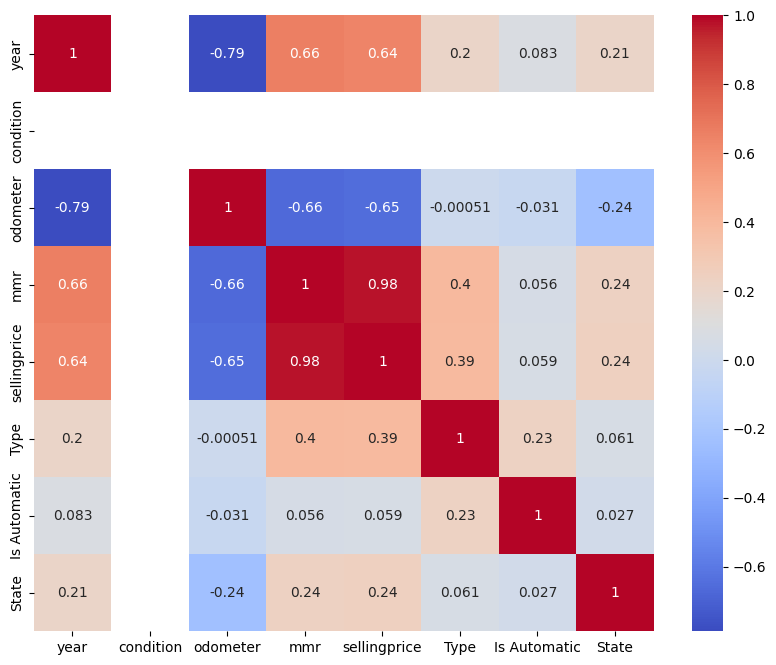

In [63]:
df_corr = df.drop(columns=['make']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

#MODEL IMPLEMENTATION

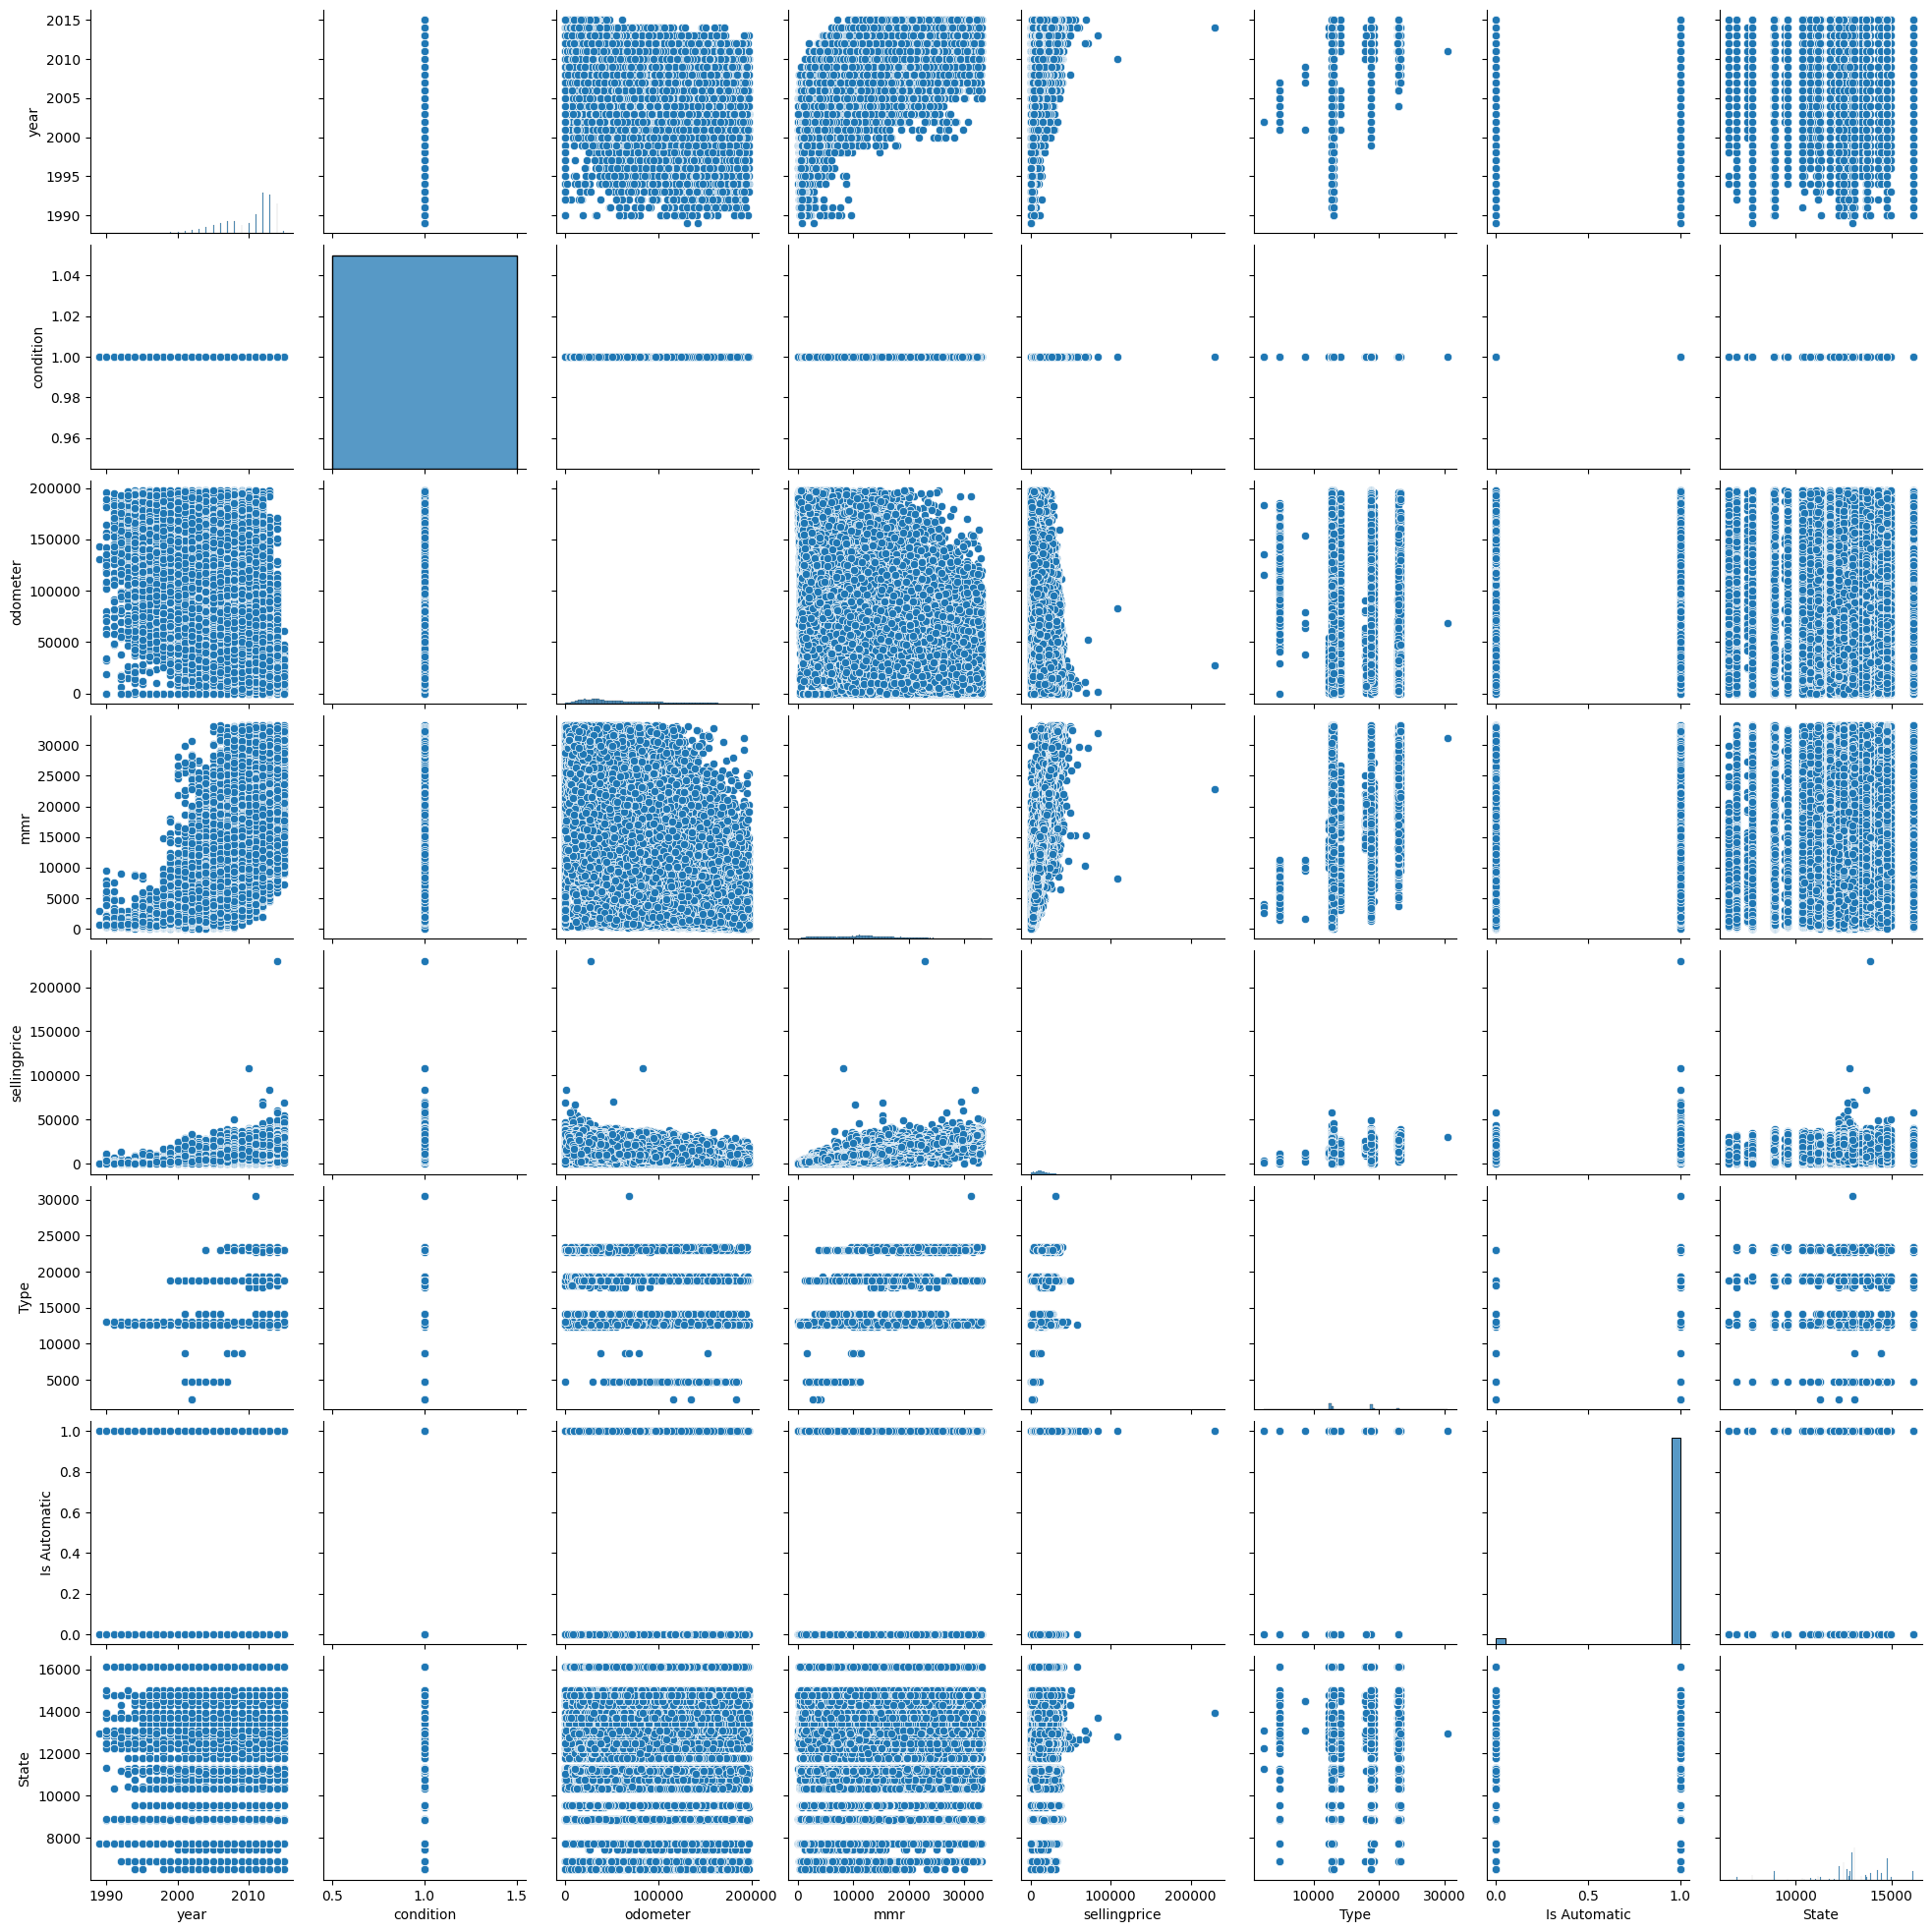

In [64]:
sns.pairplot(df)

In [65]:
df.head()

,year,make,condition,odometer,mmr,sellingprice,Type,Is Automatic,State
0,2015,Kia,1,16639.0,20500.0,21500.0,NaN,1.0,12943.67835
1,2015,Kia,1,9393.0,20800.0,21500.0,NaN,1.0,12943.67835
2,2014,BMW,1,1331.0,31900.0,30000.0,NaN,1.0,12943.67835
3,2015,Volvo,1,14282.0,27500.0,27750.0,NaN,1.0,12943.67835
4,2015,Nissan,1,5554.0,15350.0,10900.0,NaN,1.0,12943.67835


In [66]:
X = df[['year', 'mmr', 'odometer', 'Is Automatic']]
y = df['sellingprice']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
"""from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\nX_train=scaler.fit_transform(X_train)\nX_test=scaler.transform(X_test)'

In [69]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

LinearRegression()

In [70]:
predictions = lrmodel.predict(X_test)

In [71]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')

# Optional: Print the predictions
print(predictions)

Root Mean Squared Error: 1715.1374645734595
R^2 Score: 0.9481667923252897
[ 3043.18534141 10081.6193795  12626.15443949 ... 13822.42083982
  9428.16215019  6437.10304112]


In [72]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Print the DataFrame
print(comparison_df)

         Actual     Predicted
120812   3300.0   3043.185341
507058  10000.0  10081.619380
190478  12000.0  12626.154439
125751   7600.0   7682.395950
187896   5600.0   7864.455593
...         ...           ...
116797  26800.0  24152.133649
340206  11500.0  10826.598731
220927  14400.0  13822.420840
2438    10300.0   9428.162150
487051   5000.0   6437.103041

[152373 rows x 2 columns]


In [73]:
lrmodel.coef_

array([-2.77595899e+01,  9.91454692e-01, -2.78181119e-03,  2.12734897e+02])

In [74]:
lrmodel.intercept_

55733.06957718182

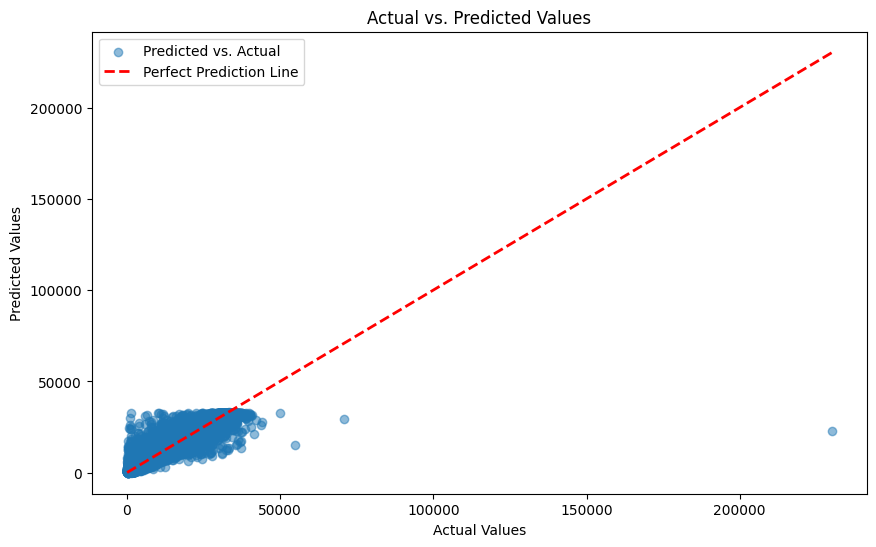

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')  # Line of perfect predictions
plt.legend()
plt.show()

#RIDGE REGRESSION

In [76]:
ridge_model = Ridge(alpha=100.0)
ridge_model.fit(X_train, y_train)

Ridge(alpha=100.0)

In [77]:
ridge_predictions = ridge_model.predict(X_test)


In [78]:
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f'Root Mean Squared Error: {ridge_rmse}')
print(f'R^2 Score: {ridge_r2}')


Root Mean Squared Error: 1715.1366107909842
R^2 Score: 0.9481668439296354


In [79]:
ridge_model.intercept_

55705.2133595265

In [80]:
ridge_model.coef_

array([-2.77448044e+01,  9.91455835e-01, -2.78096457e-03,  2.10738096e+02])

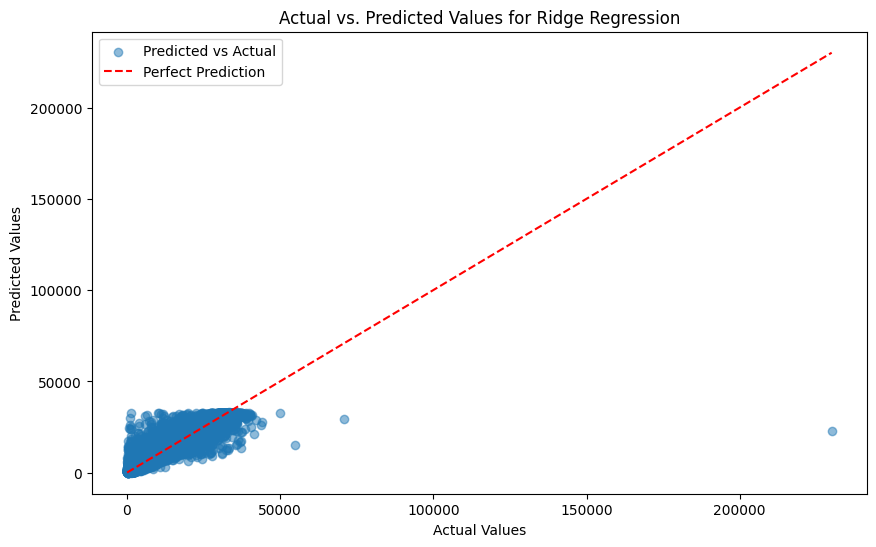

In [81]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, ridge_predictions, alpha=0.5, label='Predicted vs Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Ridge Regression')
plt.legend()
plt.show()

#LASSO REGRESSION

In [82]:
lasso = Lasso()

In [83]:
param_grid = {
    'alpha' : [0.0001,0.001,0.01,0.1,1,10,100,1000]
}

In [84]:
lasso_cv = GridSearchCV(lasso, param_grid, cv = 3, n_jobs= -1)

In [85]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [86]:
y_pred2 = lasso_cv.predict(X_test)

In [87]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred2))

r2_lasso = r2_score(y_test, y_pred2)

print(f'Root Mean Squared Error (RMSE): {rmse_lasso}')
print(f'R-squared (R^2): {r2_lasso}')

Root Mean Squared Error (RMSE): 1715.1373206333474
R-squared (R^2): 0.9481668010253239


In [88]:
lasso_cv.best_estimator_.coef_

array([-2.77553042e+01,  9.91454660e-01, -2.78157642e-03,  2.12396086e+02])

In [89]:
lasso_cv.best_estimator_.intercept_

55724.76807504342

#ELASTIC NET

In [90]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [91]:
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [92]:
y_predict_en = elastic_net.predict(X_test)

In [93]:
EN_mse = mean_squared_error(y_test, y_predict_en)
EN_rmse = np.sqrt(EN_mse)
EN_r2 = r2_score(y_test, y_predict_en)
print(f'Root Mean Squared Error: {EN_rmse}')
print(f'R^2 Score: {EN_r2}')

Root Mean Squared Error: 1715.234130396293
R^2 Score: 0.9481609494806543


In [94]:
elastic_net.coef_

array([-2.65909554e+01,  9.91509210e-01, -2.71594689e-03,  7.85503239e+01])

In [95]:
elastic_net.intercept_

53508.95245398421

In [96]:
X_test

,year,mmr,odometer,Is Automatic
120812,2003,3225.0,178877.0,1.0
507058,2011,10200.0,54816.0,1.0
190478,2013,12850.0,64630.0,1.0
125751,2007,8025.0,105543.0,0.0
187896,2009,8000.0,87702.0,1.0
...,...,...,...,...
116797,2011,24400.0,57743.0,1.0
340206,2013,10950.0,34359.0,1.0
220927,2013,13900.0,8825.0,1.0
2438,2010,9475.0,41304.0,1.0


In [104]:
df.to_csv('car_sale_prediction.csv', index=False)

#TESTING

In [97]:
#X = df[['year', 'mmr', 'odometer', 'Is Automatic']]
#y = df['sellingprice']

In [99]:
import numpy as np

# Example new data point
new_data = np.array([[2024, 12000, 15000, 1]])  # Replace these values with your actual new input

# Standardize the new data using the same scaler


# Predict using the trained Elastic Net model
predicted_price = elastic_net.predict(new_data)

print(f'Predicted Selling Price: {predicted_price[0]}')


Predicted Selling Price: 11624.780461407841


c:\Users\YEP!\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


In [105]:
import pickle

# Assuming `elastic_net` is your trained model and `scaler` 
with open('Car Sale Price Prediction Elastic Net.pkl', 'wb') as file:
    pickle.dump(elastic_net, file)




In [106]:
import pickle

# Assuming `elastic_net` is your trained model and `scaler`
with open('Car Sale Price Prediction Lasso Regression.pkl', 'wb') as file:
    pickle.dump(lasso_cv, file)




In [107]:
import pickle

# Assuming `elastic_net` is your trained model and `scaler`
with open('Car Sale Price Prediction Ridge Regression.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)




2024-08-15 15:16:50.734 
  command:

    streamlit run C:\Users\YEP!\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-08-15 15:16:50.734 Session state does not function when running a script without `streamlit run`
